# Loading Stargazers from a Repo

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
url = 'https://api.github.com/graphql'

In [3]:
import os
headers = {'Authorization': f'Bearer {os.getenv("GITHUB_TOKEN")}'}

In [4]:
json_query = {
    "query": """query {
  repository(owner: "coinse", name: "sadl") {
    stargazers(first: 100) {
      edges {
        starredAt
        node {
          login
        }
      }
    }
  }
}"""
}

In [5]:
import requests
import json

stargazers_data = requests.post(url, json=json_query, headers=headers).json()

### Stargazers JSON

In [6]:
print(json.dumps(stargazers_data, indent=4))

{
    "data": {
        "repository": {
            "stargazers": {
                "edges": [
                    {
                        "starredAt": "2019-01-03T04:58:04Z",
                        "node": {
                            "login": "ntrolls"
                        }
                    },
                    {
                        "starredAt": "2019-01-16T03:18:53Z",
                        "node": {
                            "login": "jshuhnow"
                        }
                    },
                    {
                        "starredAt": "2019-04-12T07:01:49Z",
                        "node": {
                            "login": "wellido"
                        }
                    },
                    {
                        "starredAt": "2019-05-07T03:59:57Z",
                        "node": {
                            "login": "euihyun-lee"
                        }
                    },
                    {
                        "s

#### TODO - begränsa API calls, tänk på rate limiting vid storskalig analys

In [7]:
from collections import defaultdict
from datetime import datetime

# List containing the datetimes where a new star was added.
new_star_dates = []

# Dictionary containing added stars per month, will contain K/V pairs of year and month:Str, stars:Int
stars_per_month = defaultdict(int)

# Add star dates to list
for edge in stargazers_data["data"]["repository"]["stargazers"]["edges"]:
    new_star_dates.append(datetime.fromisoformat(edge["starredAt"][:-1]))

# Parse how many stars were added each month, store in dictionary. Format the datestring as 'YYYY-MM' for year and month.
for date in new_star_dates:
    year_month = date.strftime("%Y-%m")
    stars_per_month[year_month] += 1

In [8]:
# List to keep track of cumulative stars count
cumulative_stars = []

total_stars = 0
for month in sorted(stars_per_month.keys()):
    total_stars += stars_per_month[month]
    cumulative_stars.append((month, total_stars))

### Amount of GitHub stars gained per month, year

In [9]:
for month in sorted(stars_per_month.keys()):
    print(f"{month}: {stars_per_month[month]} stars")

2019-01: 2 stars
2019-04: 1 stars
2019-05: 2 stars
2019-06: 2 stars
2019-07: 2 stars
2019-09: 2 stars
2019-10: 1 stars
2019-11: 1 stars
2020-01: 1 stars
2020-04: 1 stars
2020-05: 1 stars
2020-06: 1 stars
2020-08: 1 stars
2020-09: 1 stars
2020-10: 1 stars
2020-11: 1 stars
2020-12: 1 stars
2021-02: 1 stars
2021-03: 1 stars
2021-04: 3 stars
2021-05: 1 stars
2021-07: 1 stars
2021-10: 1 stars
2021-12: 1 stars
2022-01: 3 stars
2022-02: 1 stars
2022-03: 1 stars
2022-04: 1 stars
2022-10: 1 stars
2023-02: 1 stars
2023-04: 1 stars
2023-05: 1 stars
2023-06: 1 stars
2024-01: 1 stars


### Accumulated GitHub stars by a certain month, year

In [10]:
for month, stars in cumulative_stars:
    print(f"{month}, {stars} stars")

2019-01, 2 stars
2019-04, 3 stars
2019-05, 5 stars
2019-06, 7 stars
2019-07, 9 stars
2019-09, 11 stars
2019-10, 12 stars
2019-11, 13 stars
2020-01, 14 stars
2020-04, 15 stars
2020-05, 16 stars
2020-06, 17 stars
2020-08, 18 stars
2020-09, 19 stars
2020-10, 20 stars
2020-11, 21 stars
2020-12, 22 stars
2021-02, 23 stars
2021-03, 24 stars
2021-04, 27 stars
2021-05, 28 stars
2021-07, 29 stars
2021-10, 30 stars
2021-12, 31 stars
2022-01, 34 stars
2022-02, 35 stars
2022-03, 36 stars
2022-04, 37 stars
2022-10, 38 stars
2023-02, 39 stars
2023-04, 40 stars
2023-05, 41 stars
2023-06, 42 stars
2024-01, 43 stars


# Visualization

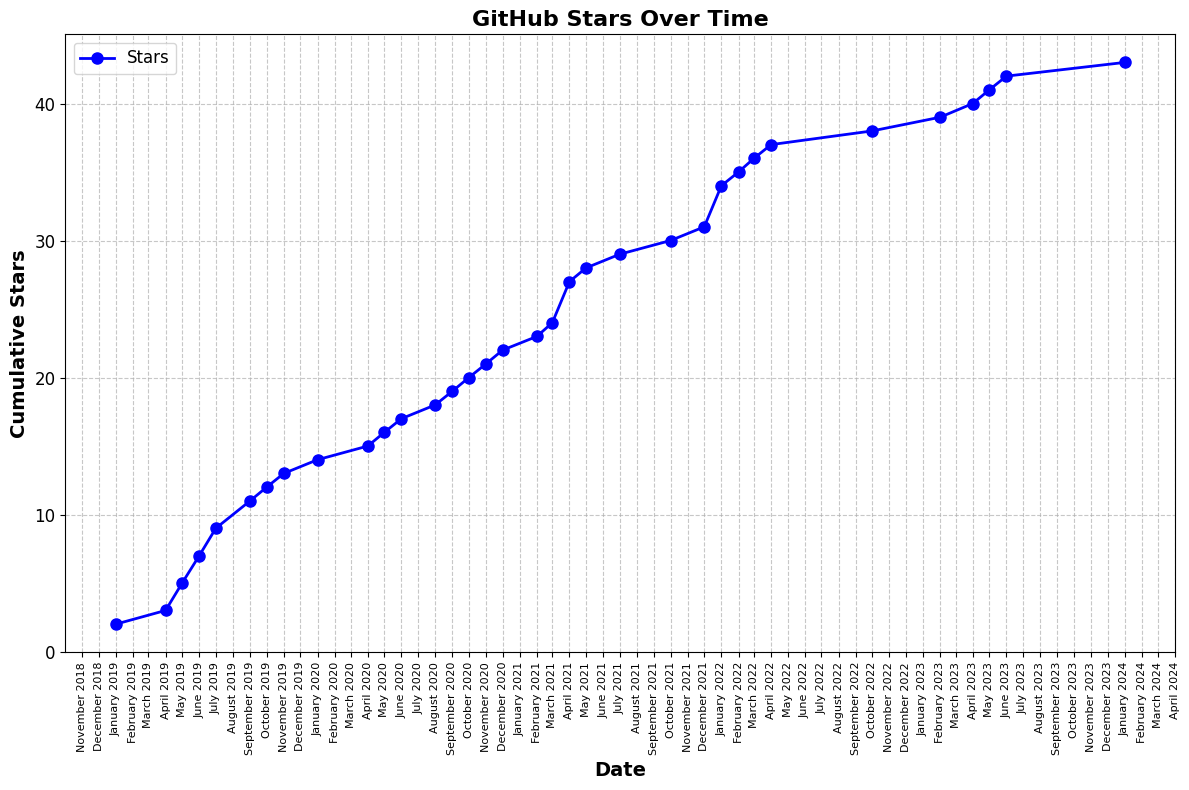

In [22]:
import matplotlib.pyplot as plotter
import matplotlib.dates as mdates

# # Split the data into two lists: one for the dates and one for the star counts
# dates, stars = zip(*cumulative_stars)
# dates = [datetime.strptime(date, "%Y-%m") for date in dates]  # Convert string dates to datetime objects

# # Create the plot
# plotter.figure(figsize=(10, 6))  # Set the figure size
# plotter.plot(dates, stars, marker='o', linestyle='-', color='b')  # Plot the data

# plotter.title('GitHub Stars Over Time')  # Set the title
# plotter.xlabel('Date')  # Set the x-axis label
# plotter.ylabel('Cumulative Stars')  # Set the y-axis label
# plotter.grid(True)  # Add gridlines
# plotter.xticks(rotation=45)  # Rotate date labels for better readability

# # Show the plot
# plotter.show()


# # Split the data into two lists: one for the dates and one for the star counts
# dates, stars = zip(*cumulative_stars)
# dates = [datetime.strptime(date, "%Y-%m") for date in dates]  # Convert string dates to datetime objects

# # Create the plot
# plotter.figure(figsize=(12, 8))  # Set the figure size
# plotter.plot(dates, stars, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)  # Plot the data

# plotter.title('GitHub Stars Over Time', fontsize=16, fontweight='bold')  # Set the title
# plotter.xlabel('Date', fontsize=14, fontweight='bold')  # Set the x-axis label
# plotter.ylabel('Cumulative Stars', fontsize=14, fontweight='bold')  # Set the y-axis label
# plotter.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed lines and reduced opacity
# plotter.xticks(rotation=45, fontsize=12)  # Rotate date labels for better readability and set font size
# plotter.yticks(fontsize=12)  # Set font size for y-axis ticks

# # Add a legend
# plotter.legend(['Stars'], loc='upper left', fontsize=12)

# # Show the plot
# plotter.tight_layout()  # Adjust layout to prevent clipping of labels
# plotter.show()

# Split the data into two lists: one for the dates and one for the star counts
# dates, stars = zip(*cumulative_stars)
# dates = [datetime.strptime(date, "%Y-%m") for date in dates]  # Convert string dates to datetime objects

# # Create the plot
# plotter.figure(figsize=(12, 8))  # Set the figure size
# plotter.plot(dates, stars, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)  # Plot the data

# plotter.title('GitHub Stars Over Time', fontsize=16, fontweight='bold')  # Set the title
# plotter.xlabel('Date', fontsize=14, fontweight='bold')  # Set the x-axis label
# plotter.ylabel('Cumulative Stars', fontsize=14, fontweight='bold')  # Set the y-axis label
# plotter.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed lines and reduced opacity
# plotter.xticks(rotation=90, fontsize=8)  # Rotate date labels for better readability and set font size
# plotter.yticks(fontsize=12)  # Set font size for y-axis ticks

# # Set x-axis tick frequency to monthly
# plotter.gca().xaxis.set_major_locator(mdates.MonthLocator())

# # Set the format of the x-axis tick labels to include full month names
# plotter.gca().xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))

# # Add a legend
# plotter.legend(['Stars'], loc='upper left', fontsize=12)

# # Show the plot
# plotter.tight_layout()  # Adjust layout to prevent clipping of labels
# plotter.show()









# Split the data into two lists: one for the dates and one for the star counts
dates, stars = zip(*cumulative_stars)
dates = [datetime.strptime(date, "%Y-%m") for date in dates]  # Convert string dates to datetime objects

# Create the plot
plotter.figure(figsize=(12, 8))  # Set the figure size
plotter.plot(dates, stars, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)  # Plot the data

plotter.title('GitHub Stars Over Time', fontsize=16, fontweight='bold')  # Set the title
plotter.xlabel('Date', fontsize=14, fontweight='bold')  # Set the x-axis label
plotter.ylabel('Cumulative Stars', fontsize=14, fontweight='bold')  # Set the y-axis label
plotter.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed lines and reduced opacity
plotter.xticks(rotation=90, fontsize=8)  # Rotate date labels for better readability and set font size
plotter.yticks(fontsize=12)  # Set font size for y-axis ticks

# Set x-axis tick frequency to monthly
plotter.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Set the format of the x-axis tick labels to show month names for each month, and year for the first month of each year
plotter.gca().xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))

# Add a legend
plotter.legend(['Stars'], loc='upper left', fontsize=12)

# Show the plot
plotter.tight_layout()  # Adjust layout to prevent clipping of labels
plotter.show()

